In [58]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
predicted_attributes = {}
with open("val-imagenet-attributes.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        predicted_attributes[row["image"].split("/")[-1]] = {
            "time": int(row["time"]),
            "weather": int(row["weather"]),
            "locations": np.fromstring(row["location"][1:-1], sep=" "),
        }
print(predicted_attributes["ILSVRC2012_val_00049343.JPEG"])

{'time': 1, 'weather': 6, 'locations': array([0.0047, 0.0191, 0.006 , 0.0346, 0.1109, 0.5991, 0.0011, 0.193 ,
       0.0316])}


In [16]:
gt_attributes = {}
times = {
    "day": 0,
    "night": 1,
    "none": 2,
}

weathers = {
    "cloudy": 0,
    "foggy": 1,
    "partly cloudy": 2,
    "raining": 3,
    "snowing": 4,
    "sunny": 5,
    "none": 6,
}
with open("./cleaned_imagenet_annotations.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        gt_attributes[row["image"].split("/")[-1]] = {
            "time": times[row["time"]],
            "weather": weathers[row["weather"]],
            "locations": np.fromstring(row["locations"][1:-1], sep=", "),
        }
print(gt_attributes["ILSVRC2012_val_00049343.JPEG"])

{'time': 0, 'weather': 5, 'locations': array([0., 0., 0., 0., 1., 0., 0., 0., 0.])}


In [25]:
num = 0
for image in gt_attributes:
    num += (gt_attributes[image]["time"] == predicted_attributes[image]["time"])
print(num)

3499


In [26]:
ct = 0
cw = 0
for image in gt_attributes:
    ct += (gt_attributes[image]["time"] == predicted_attributes[image]["time"])
    cw += (gt_attributes[image]["weather"] == predicted_attributes[image]["weather"])
print(ct / len(gt_attributes), cw / len(gt_attributes))

0.7399027278494397 0.7069147811376613


In [137]:
locations = {
    "forest": 0,
    "grass": 1,
    "indoors": 2,
    "rocks": 3,
    "sand": 4,
    "street": 5,
    "snow": 6,
    "water": 7,
    "none": 8,
}
total = 0
for location in range(9):
    cl = 0
    wl = 0
    for image in gt_attributes:
        location_stat = (np.fromstring(row["location"][1:-1], sep=" ") > 1 / 9)
        if sum(location_stat) > 1:
            location_stat[-1] = 0
        gt = gt_attributes[image]["locations"][location]
        pr = location_stat[location]
        if (gt == 1 and pr > 1 / 9) or (gt == 0 and pr <= 1 / 9):
            cl += 1    
    total += (cl / len(gt_attributes))
print(total / 9)

0.7504522920044172


time_stats = np.zeros(3)
weather_stats = np.zeros(7)
location_stats = np.zeros(9)
train_predicted_attributes = {}
with open("imagenet-attributes.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        time_stats[int(row["time"])] += 1
        weather_stats[int(row["weather"])] += 1
        location_stat = (np.fromstring(row["location"][1:-1], sep=" ") > 1 / 9)
        if sum(location_stat) > 1:
            location_stat[-1] = 0
        location_stats += location_stat
        

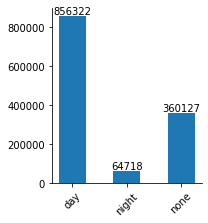

In [112]:
plt.figure(figsize=(3, 3))
plt.bar(times.keys(), time_stats, 0.5)
for index, data in enumerate(time_stats):
    plt.text(x=index, y=data + 10000, s=f"{int(data)}", ha='center')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().savefig("../../logs/time_stats.pdf", bbox_inches="tight")

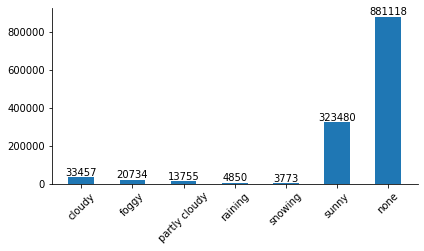

In [110]:
plt.figure(figsize=(6, 3))
plt.bar(weathers.keys(), weather_stats, 0.5)
for index, data in enumerate(weather_stats):
    plt.text(x=index, y=data + 10000, s=f"{int(data)}", ha='center')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().savefig("../../logs/weather_stats.pdf", bbox_inches="tight")

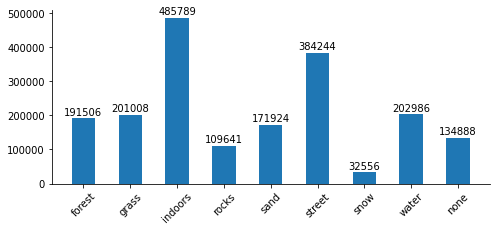

In [109]:
plt.figure(figsize=(7, 3))
plt.bar(locations.keys(), location_stats, 0.5)
for index, data in enumerate(location_stats):
    plt.text(x=index, y=data + 10000, s=f"{int(data)}", ha='center')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().savefig("../../logs/location_stats.pdf", bbox_inches="tight")

In [69]:
print(time_stats)

[856322.  64718. 360127.]


In [70]:
print(weather_stats)

[ 33457.  20734.  13755.   4850.   3773. 323480. 881118.]


In [71]:
print(location_stats)

[191506. 201008. 485789. 109641. 171924. 384244.  32556. 202986. 675626.]


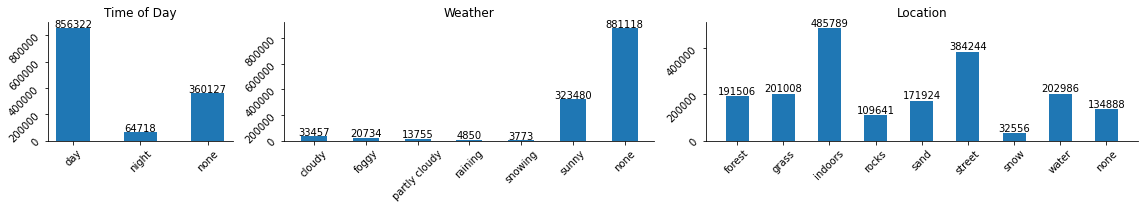

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3), gridspec_kw={'width_ratios':[3, 6, 7]})
axs[0].bar(times.keys(), time_stats, 0.5)
for index, data in enumerate(time_stats):
    axs[0].text(x=index, y=data + 10000, s=f"{int(data)}", ha='center')
axs[0].tick_params(labelrotation=45)
axs[0].title.set_text("Time of Day")
axs[1].bar(weathers.keys(), weather_stats, 0.5)
for index, data in enumerate(weather_stats):
    axs[1].text(x=index, y=data + 10000, s=f"{int(data)}", ha='center')
axs[1].tick_params(labelrotation=45)
axs[1].title.set_text("Weather")
axs[2].bar(locations.keys(), location_stats, 0.5)
for index, data in enumerate(location_stats):
    plt.text(x=index, y=data + 10000, s=f"{int(data)}", ha='center')
axs[2].tick_params(labelrotation=45)
axs[2].title.set_text("Location")
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)


plt.tight_layout()
plt.gcf().savefig("../../logs/stats.pdf", bbox_inches="tight")